# References

In [ ]:
# NLP Basics: What is Natural Language Processing & the Natural Language Toolkit?

In [5]:
# imports
import os
import numpy as np
import pandas as pd
import re
import string
import time
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline

string.punctuation
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [2]:
# settings
pd.set_option('display.max_colwidth', 100)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# getting help

# help(plt.hist)
# help(plt.legend)

In [ ]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

In [ ]:
#Download NLTK data
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


# Utils

In [19]:
# Utils

stopword = nltk.corpus.stopwords.words('english')

# remove punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# tokenize
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# remove stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopword]
    return text

# stem text
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

# lemmatize text
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

# Create feature for % of text that is punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100


In [ ]:
# list nltkfunctions
#dir(nltk)

# Data preparation 

In [6]:
# read files
'''
path = 'e:/PycharmProjects/NLP/input'
file1 = path +'/spam.csv'
file2 = path + '/datasets_483_982_spam.csv'
rawData = pd.read_csv(file2,encoding = "ISO-8859-1")
'''

path = os.path.abspath(os.getcwd())
datadir = 'data'
full_path = os.path.join(path, datadir)
spam_file = os.path.join(full_path, "datasets_483_982_spam.csv")
rawData = pd.read_csv(spam_file, encoding = "ISO-8859-1")

In [7]:
# prepare dataset
fullCorpus = rawData[['v1', 'v2']]
fullCorpus.head()
fullCorpus.columns = ['label', 'body_text'];
fullCorpus.head()
data = fullCorpus

# Explore the dataset

In [8]:
# explore the dataset

# What is the shape of the dataset?
print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

# How many spam/ham are there?
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))
# How much missing data is there?
print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull().sum()))

Input data has 5572 rows and 2 columns
Out of 5572 rows, 747 are spam, 4825 are ham
Number of null in label: 0
Number of null in text: 0


# NLP Basics

In [7]:
# stopwords

stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## Useing regular expressions

In [11]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

In [14]:
# Splitting a sentence into a list of words

print(re.split('\s', re_test))
print(re.split('\s', re_test_messy))
print(re.split('\s', re_test_messy1))
print(re.split('\s+', re_test_messy))
print(re.split('\w+', re_test_messy1))
print(re.split('\w+', re_test_messy1))
print(re.split('\W+', re_test_messy1))
print(re.split('\S+', re_test_messy))

['This', 'is', 'a', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']
['This', '', '', '', '', '', 'is', 'a', 'made', 'up', '', '', '', '', 'string', 'to', 'test', '2', '', '', '', 'different', 'regex', 'methods']
['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']
['This', 'is', 'a', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']
['', '-', '-', '-', '/', '.', '*', '>>>>', '----', '""""""', '~', '-', '']
['', '-', '-', '-', '/', '.', '*', '>>>>', '----', '""""""', '~', '-', '']
['This', 'is', 'a', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']
['', '      ', ' ', ' ', ' ', '     ', ' ', ' ', ' ', '    ', ' ', ' ', '']


In [15]:
# Replacing a specific string

pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

print(re.findall('[a-z]+', pep8_test))
print(re.findall('[A-Z]+', pep8_test))
print(re.findall('[A-Z]+[0-9]+', peep8_test))
print(re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', peep8_test))


['try', 'to', 'follow', 'guidelines']
['I', 'PEP']
['PEEP8']
I try to follow PEP8 Python Styleguide guidelines


## Implementing a pipeline to clean text

In [18]:
# remove punctuation
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

# tokenize
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

# remove stopwords
data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

# clean (remove punctuation, tokenize, remove stopwords) text
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

# stemming
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

# clean text
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))

#data.head()


,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[Nah, I, dont, think, goes, usf, lives, around, though]"


## Supplemental Data Cleaning: Using a Lemmatizer (stemming)

In [84]:
# examples of stemming
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

grow
grow
grow
run
run
runner


In [89]:
data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...,"[freemsg, hey, there, darling, its, been, 3, weeks, now, and, no, word, back, id, like, some, fu...","[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send...","[freemsg, hey, darl, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chg, send, å, ...","[freemsg, hey, darling, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send,..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To ...,WINNER As a valued network customer you have 

# Vectorizing Raw Data

## Count Vectorization

In [20]:
count_vect = CountVectorizer(analyzer=clean_text)

mytext = '''In the real world, a Pandas DataFrame will be created DataFrame loading the datasets from existing storage,
storage can be SQL Database, CSV file, and Excel file. Pandas DataFrame can be loading from the lists, dictionary, 
and from a list of dictionary etc CSV Excel CSV csv''';

mydata = {'body':  [mytext]}

df = pd.DataFrame(mydata)

X_counts = count_vect.fit_transform(data['body_text'])
X_counts = count_vect.fit_transform(df['body'])

print(X_counts.shape)
print(count_vect.get_feature_names())
print(X_counts.toarray())

(1, 20)
['CSV', 'DataFrame', 'Database', 'Excel', 'In', 'Pandas', 'SQL', 'created', 'csv', 'datasets', 'dictionary', 'etc', 'existing', 'file', 'list', 'lists', 'loading', 'real', 'storage', 'world']
[[3 3 1 2 1 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1]]


In [21]:
# apply CountVectorizer to smaller sample
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
encoded_counts_sample = count_vect_sample.fit(data_sample['body_text'])
print(count_vect_sample.vocabulary_)

X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())


{'Go': 51, 'jurong': 165, 'point': 192, 'crazy': 134, 'Available': 28, 'bugis': 121, 'n': 181, 'great': 158, 'world': 249, 'la': 168, 'e': 141, 'buffet': 120, 'Cine': 35, 'got': 155, 'amore': 111, 'wat': 236, 'Ok': 75, 'lar': 169, 'Joking': 62, 'wif': 242, 'u': 229, 'oni': 189, 'Free': 48, 'entry': 146, '2': 11, 'wkly': 244, 'comp': 132, 'win': 243, 'FA': 45, 'Cup': 39, 'final': 148, 'tkts': 224, '21st': 14, 'May': 66, '2005': 13, 'Text': 88, '87121': 22, 'receive': 199, 'questionstd': 196, 'txt': 228, 'rateTCs': 197, 'apply': 113, '08452810075over18s': 1, 'U': 96, 'dun': 140, 'say': 205, 'early': 142, 'hor': 161, 'c': 122, 'already': 110, 'Nah': 70, 'I': 57, 'dont': 139, 'think': 221, 'goes': 153, 'usf': 232, 'lives': 173, 'around': 114, 'though': 222, 'FreeMsg': 49, 'Hey': 56, 'darling': 138, '3': 15, 'weeks': 240, 'word': 247, 'back': 116, 'Id': 58, 'like': 171, 'fun': 151, 'still': 214, 'Tb': 87, 'ok': 188, 'XxX': 106, 'std': 213, 'chgs': 127, 'send': 208, 'å': 252, '150': 8, 'rcv'

In [ ]:
# parse matrix

X_counts_sample
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

In [15]:
# Simple CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the brown, brown,lazy dog dog dog dog."]
text1 = ["The brown, brown,lazy dog dog dog dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())
print(vectorizer.get_feature_names())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[3 4 1 1 1 1 1 2]]
['brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the']


## N-Grams

In [ ]:
# example
text = ['''I have posted my sample train data as well as test data along with my code. I'm trying to use Naive 
           Bayes algorithm to train the model.''']

# initialise n-gram vectoriser 
ngram_vectorizer = CountVectorizer(ngram_range=(1,3))
X_counts = ngram_vectorizer.fit_transform(data['body_text_clean'][0:3])

#print(ngram_vectorizer.vocabulary_)
#print(X_counts.shape)
#print(ngram_vectorizer.get_feature_names())
#print(X_counts.toarray())

# create a dataframe from a word matrix
df = pd.DataFrame(data=X_counts.toarray(),
                      columns=ngram_vectorizer.get_feature_names())
df

## TF-IDF

In [ ]:
# Apply TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf = tfidf_vect.fit_transform(data['body_text'][0:3])


# print(X_tfidf.shape)
# print(tfidf_vect.get_feature_names())

df = pd.DataFrame(data=X_tfidf.toarray(),
                      columns=tfidf_vect.get_feature_names())
df

# Feature Engineering

## Create feature for text message length

In [28]:
# Create feature for text message length

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,cleaned_text,body_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]",92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...",128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",39
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[Nah, I, dont, think, goes, usf, lives, around, though]",49


## Create feature for % of text that is punctuation

In [29]:
# Create feature for % of text that is punctuation
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,cleaned_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]",92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...",128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[Nah, I, dont, think, goes, usf, lives, around, though]",49,4.1


## Evaluate created features

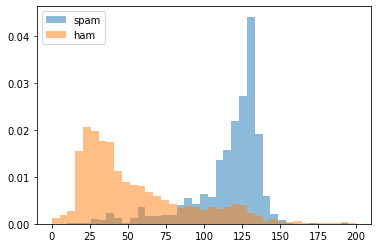

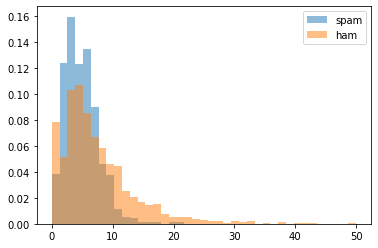

In [30]:
# Evaluate created features

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

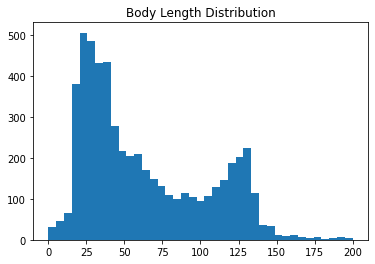

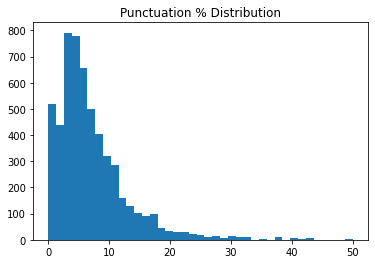

In [58]:
# Evaluate created features

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

## Power transformations

In [ ]:
# Transform the punctuation % feature


In [ ]:
# Additional on Power transformations

pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe

# SMOTE for imbalanced classification with python
# How to Selectively Scale Numerical Input Variables for Machine Learning

# Building Machine Learning Classifiers

## Prepare data

In [31]:
# Prepare data

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# apply tfidf tokenization
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

# create new features
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building a basic Random Forest Classifier

In [33]:
# Building a basic Random Forest Classifier

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97399103, 0.97578475, 0.97935368, 0.97037702, 0.97396768])

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [35]:
# Random Forest on a holdout test set

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))
 


Precision: 1.0 / Recall: 0.616 / Accuracy: 0.945


In [36]:
# Random Forest model check :: Build our own Grid-search
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.371 / Accuracy: 0.91
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.642 / Accuracy: 0.949
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.686 / Accuracy: 0.955
Est: 10 / Depth: None ---- Precision: 0.984 / Recall: 0.792 / Accuracy: 0.969
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.233 / Accuracy: 0.891
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.547 / Accuracy: 0.935
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.704 / Accuracy: 0.958
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.824 / Accuracy: 0.975
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.302 / Accuracy: 0.9
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.623 / Accuracy: 0.946
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.717 / Accuracy: 0.96
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.818 / Accuracy: 0.974


In [37]:
# Random Forest model check with grid-search
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, data['label'])


pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,92.269819,0.907065,0.920473,0.151004,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976682,0.977578,0.976661,0.969479,0.976661,0.975412,0.002987,1
7,46.646538,1.492864,0.719282,0.246484,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975785,0.976682,0.976661,0.971275,0.973070,0.974694,0.002160,2
10,52.915152,2.183563,1.010898,0.349232,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976682,0.973991,0.976661,0.970377,0.973968,0.974336,0.002317,3
11,94.001685,1.189360,0.978436,0.221797,None,300,"{'max_depth': None, 'n_estimators': 300}",0.974888,0.975785,0.976661,0.969479,0.974865,0.974336,0.002517,3
6,4.514286,0.539923,0.367794,0.065158,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.974888,0.978475,0.968582,0.973968,0.972172,0.973617,0.003249,5


## Building Gradient Boosting model (with grid-search)

In [ ]:
# Gradient Boosting Classifier:: Build our own Grid-search

def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))
    
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

In [15]:
# Gradient Boosting Classifier :: Exploring parameter settings using GridSearchCV

gb = GradientBoostingClassifier()
param = {
    'n_estimators': [10, 100], 
    'max_depth': [7, 11],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_features, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,448.244170,14.546160,0.621032,0.220888,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.970404,0.977578,0.973070,0.969479,0.967684,0.971644,0.003440,1
3,544.594816,78.519455,0.344001,0.158821,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.966816,0.978475,0.972172,0.964991,0.967684,0.970029,0.004841,2
2,76.572180,5.459764,0.363821,0.059442,0.1,11,10,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 10}",0.965022,0.968610,0.963196,0.958707,0.958707,0.962850,0.003804,3
0,43.590549,0.486445,0.430625,0.009479,0.1,7,10,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10}",0.956054,0.950673,0.956014,0.954219,0.958707,0.955133,0.002651,4


## Final evaluation of models :: Random Forest or Gradient Boosting

In [18]:
# choosing the best performing Random Forest Model
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 4.28 / Predict time: 0.18 ---- Precision: 1.0 / Recall: 0.848 / Accuracy: 0.978


In [19]:
# choosing the best performing Random Forest Model

gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 322.161 / Predict time: 0.23 ---- Precision: 0.971 / Recall: 0.823 / Accuracy: 0.97


In [ ]:
# Additional on Power transformations

pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe

# SMOTE for imbalanced classification with python
# How to Selectively Scale Numerical Input Variables for Machine Learning